In [166]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [167]:
#Read the data in pandas
df= pd.read_csv("Attribute+DataSet.csv")
df1= pd.read_csv("Dress+Sales.csv")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


In [168]:
df.Price.dtypes

dtype('O')

In [169]:
df.Price.head()

0        Low
1        Low
2       High
3    Average
4        Low
Name: Price, dtype: object

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


In [170]:
df.Recommendation.dtypes

dtype('int64')

In [171]:
df.Recommendation.head()

0    1
1    0
2    0
3    1
4    0
Name: Recommendation, dtype: int64

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [172]:
# Print the information about the attributes of inp0 and inp1.


### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [173]:
df.Size.unique()

array(['M', 'L', 'XL', 'free', 'S', 'small', 's'], dtype=object)

In [174]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
a=['M', 'L', 'XL', 'free', 'S', 'small', 's']
b=["Medium","Large","Extra large","Free","Small","Small","Small"]
df.Size.replace(a,b,inplace=True)
df.Size

0      Medium
1       Large
2       Large
3       Large
4      Medium
        ...  
474    Medium
475    Medium
476    Medium
477     Large
478      Free
Name: Size, Length: 479, dtype: object

In [175]:
# Calculate Percentage
df.Size.value_counts()/df.shape[0]*100

Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: Size, dtype: float64

### Impute/Remove Missing values

In [176]:
# Print the null count of each variables of inp0 and inp1.


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [177]:
# Print the data types information of df1 i.e. "Dress Sales" data.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [178]:
df1.iloc[:,8:15].head()

,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013
0,3119,3204,3277,3321,3386,3479,3554
1,1558,1756,1878,1985,2106,2454,2710
2,10,10,10,10,10,11,11
3,1723,1746,1783,1796,1812,1845,1878
4,1638,1655,1681,1743,1824,1919,2032


In [179]:
a = ["09-12-2013", "14-09-2013", "16-09-2013", "18-09-2013", "20-09-2013", "22-09-2013"]

# Extract unique values starting with an alphabet for each specified column
for column in a:
    unique_values = df1[column].astype(str).str.extract(r'([A-Za-z].*)', expand=False).unique()
    print(f"Unique values for '{column}' starting with an alphabet:", unique_values)

Unique values for '09-12-2013' starting with an alphabet: [nan 'Removed']
Unique values for '14-09-2013' starting with an alphabet: [nan 'removed']
Unique values for '16-09-2013' starting with an alphabet: [nan 'removed']
Unique values for '18-09-2013' starting with an alphabet: [nan 'removed']
Unique values for '20-09-2013' starting with an alphabet: [nan 'removed']
Unique values for '22-09-2013' starting with an alphabet: [nan 'Orders']


In [180]:
df1.shape


(479, 24)

In [181]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
df1.loc[df1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN
df1.loc[df1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN
df1.loc[df1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN
df1.loc[df1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN
df1.loc[df1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN
df1.loc[df1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [182]:
# Convert the object type columns in "Dress Sales" into float type of data type.
a = ["09-12-2013", "14-09-2013", "16-09-2013", "18-09-2013", "20-09-2013", "22-09-2013"]
df1[a]=df1[a].astype("float")

In [183]:
df1.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013    float64
14-09-2013    float64
16-09-2013    float64
18-09-2013    float64
20-09-2013    float64
22-09-2013    float64
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [184]:
# Get the NUll Value counts
df1.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [185]:
# Print the null percetange of each column of df1 greater than 40
per_null=df1.isnull().sum()/df1.shape[0]*100
per_null[per_null>40]

26-09-2013    46.346555
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-08-2013    53.235908
10-10-2013    53.235908
dtype: float64

In [186]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
b=per_null[per_null>40].index
df1.drop(b,axis=1,inplace=True)


In [187]:
# check again if following columns have been dropped
df1.isnull().sum()/df1.shape[0]*100

Dress_ID      0.000000
29-08-2013    0.000000
31-08-2013    0.000000
09-02-2013    0.000000
09-04-2013    0.000000
09-06-2013    0.000000
09-08-2013    0.000000
09-10-2013    0.000000
09-12-2013    0.208768
14-09-2013    0.208768
16-09-2013    0.208768
18-09-2013    0.208768
20-09-2013    0.208768
22-09-2013    0.208768
24-09-2013    0.000000
28-09-2013    0.000000
10-06-2013    0.000000
10-12-2013    0.000000
dtype: float64

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [188]:
df1.columns

Index(['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '28-09-2013', '10-06-2013', '10-12-2013'],
      dtype='object')

In [189]:
# Create the four seasons columns in df1, according to the above criteria.
df1['Summer'] = df1['09-06-2013'] + df1['10-06-2013'] + df1['29-08-2013'] + df1['31-08-2013'] + df1['09-08-2013']
df1['Autumn'] = df1['09-10-2013'] + df1['14-09-2013'] + df1['16-09-2013'] + df1['18-09-2013'] + df1['20-09-2013'] + df1['22-09-2013'] + df1['24-09-2013'] + df1['28-09-2013']
df1['Winter'] = df1['09-12-2013'] + df1['10-12-2013'] + df1['09-02-2013']
df1['Spring'] = df1['09-04-2013']

In [190]:
df1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [191]:
# calculate the sum of sales in each seasons in df1 i.e. "Dress Sales".
df1[['Summer','Autumn','Winter','Spring']].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [192]:
# Merge df with df1 into df. this is also called left merge.
df = pd.merge(left=df,right=df1, how='left', left_on='Dress_ID', right_on='Dress_ID')
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [193]:
# Now Drop the Date columns from df as it is already combined into four seasons.
df.drop(df.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)


C:\Users\hun95\AppData\Local\Temp\ipykernel_1440\3945129217.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.drop(df.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)


Print the null count of df to get the idea about the missing values in data set.

In [194]:
# Print the null count of each columns in df dataframe i.e. combined data frame of df and df1 without date columns.
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [195]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
df = df[~df.Price.isnull()]
df = df[~df.Season.isnull()]
df = df[~df.NeckLine.isnull()]
df = df[~df.SleeveLength.isnull()]
df = df[~df.Winter.isnull()]
df = df[~df.Autumn.isnull()]

In [196]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
df.Material= df.Material.replace(np.nan, "Missing")
df.FabricType= df.FabricType.replace(np.nan, "Missing")
df.Decoration= df.Decoration.replace(np.nan, "Missing")
df['Pattern Type']= df['Pattern Type'].replace(np.nan, "Missing")

In [197]:
df.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Summer            0
Autumn            0
Winter            0
Spring            0
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [198]:
df['Season'].unique()

array(['Summer', 'Automn', 'Spring', 'Winter', 'spring', 'winter',
       'Autumn'], dtype=object)

In [199]:
df['SleeveLength'].unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       'thressqatar', 'sleveless'], dtype=object)

In [200]:
df['NeckLine'].unique()

array(['o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled',
       'turndowncollor', 'slash-neck', 'mandarin-collor', 'open',
       'sqare-collor', 'Sweetheart', 'sweetheart', 'Scoop', 'halter',
       'backless', 'bowneck'], dtype=object)

In [201]:
df['Decoration'].unique()

array(['ruffles', 'Missing', 'embroidary', 'bow', 'beading', 'lace',
       'sashes', 'hollowout', 'pockets', 'sequined', 'applique', 'button',
       'Tiered', 'rivet', 'feathers', 'flowers', 'pearls', 'crystal',
       'ruched', 'draped', 'tassel', 'plain', 'cascading', 'none'],
      dtype=object)

In [202]:
df['FabricType'].unique()

array(['chiffon', 'Missing', 'broadcloth', 'jersey', 'other', 'batik',
       'satin', 'flannael', 'worsted', 'poplin', 'dobby', 'knitting',
       'flannel', 'tulle', 'sattin', 'organza', 'lace', 'Corduroy',
       'wollen', 'knitted', 'shiffon', 'terry'], dtype=object)

In [203]:
#correcting the spellings.
df.Season= df.Season.replace('Automn', "Autumn")
df.Season= df.Season.replace('spring', "Spring")
df.Season= df.Season.replace('winter', "Winter")


In [204]:
#correcting the Spellings.
df.SleeveLength= df.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")
df.SleeveLength= df.SleeveLength.replace('full', "full sleeves")
df.SleeveLength= df.SleeveLength.replace(['half','halfsleeve'], "half sleeves")
df.SleeveLength= df.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")
df.SleeveLength= df.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")
df.SleeveLength= df.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [205]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.

df["Sales"]=df.Summer+df.Autumn+df.Winter+df.Spring

In [206]:
b=df.groupby("Style").sum() 
b.head()

C:\Users\hun95\AppData\Local\Temp\ipykernel_1440\4110929928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=df.groupby("Style").sum()


,Dress_ID,Rating,Recommendation,Summer,Autumn,Winter,Spring,Sales
Style,,,,,,,,
Brief,14913154280,69.1,4,37303,69821.0,25020.0,7484,139628.0
Casual,192788739987,765.7,84,282913,566744.0,192922.0,60979,1103558.0
Flare,2011575734,0.0,1,451,1161.0,406.0,71,2089.0
Novelty,6799573268,14.1,3,2866,7353.0,2504.0,563,13286.0
OL,1194626925,0.0,0,63,158.0,53.0,15,289.0


In [207]:
b[b.Sales<50000]

,Dress_ID,Rating,Recommendation,Summer,Autumn,Winter,Spring,Sales
Style,,,,,,,,
Flare,2011575734,0.0,1,451,1161.0,406.0,71,2089.0
Novelty,6799573268,14.1,3,2866,7353.0,2504.0,563,13286.0
OL,1194626925,0.0,0,63,158.0,53.0,15,289.0
fashion,836788720,4.0,0,91,211.0,74.0,19,395.0


In [212]:
df.replace(b[b.Sales < 50000].index,"others",inplace=True)

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [215]:
# Calculate the percentage of each categories in the "Style" variable.
(df.Style.value_counts(normalize=True)*100)

Casual      46.072187
Sexy        13.800425
party       10.191083
cute         9.129512
vintage      5.307856
bohemian     4.883227
Brief        3.609342
work         3.609342
others       2.123142
sexy         1.273885
Name: Style, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [ ]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.


In [ ]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.


Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [ ]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.


### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


In [218]:
df.Style.value_counts()

Casual      217
Sexy         65
party        48
cute         43
vintage      25
bohemian     23
Brief        17
work         17
others       10
sexy          6
Name: Style, dtype: int64

In [221]:
df.Price.value_counts()

Average      237
Low          162
Medium        30
High          21
very-high     21
Name: Price, dtype: int64

In [220]:
df.Season.value_counts()

Summer    151
Winter    136
Spring    118
Autumn     66
Name: Season, dtype: int64

In [219]:
df.Size.value_counts()

Medium         170
Free           162
Large           89
Small           36
Extra large     14
Name: Size, dtype: int64

### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [222]:
# Describe the numerical variale: "Autumn".
df.Autumn.describe()

count      471.000000
mean      2852.849257
std       5037.033044
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn, dtype: float64

In [227]:
df.Autumn.quantile(1)-df.Autumn.quantile(0.75)

52406.0

<Axes: >

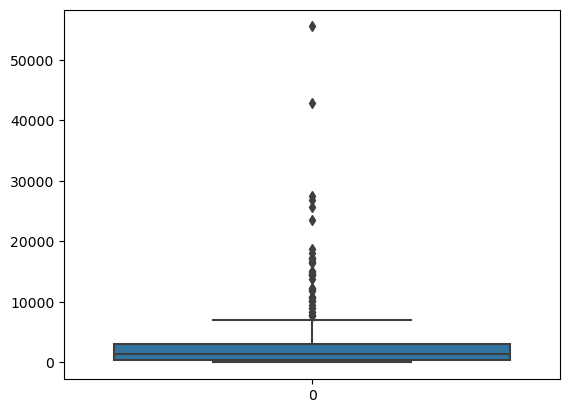

In [226]:
# plot the boxplot of "Autumn" column.
sns.boxplot(df.Autumn)

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [228]:
# Find the maximum and 99th percentile of Winter season.
df.Winter.quantile(1)-df.Winter.quantile(0.99)

11402.69999999999

In [229]:
# Find the maximum and 99th percentile of Summer season.
df.Summer.quantile(1)-df.Summer.quantile(0.99)

21602.999999999996

In [230]:
# Find the maximum and 99th percentile of Spring season.
df.Spring.quantile(1)-df.Spring.quantile(0.99)

4716.8

In [231]:
# Find the maximum and 99th percentile of Autumn season.
df.Autumn.quantile(1)-df.Autumn.quantile(0.99)

31397.999999999975

## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [232]:
# Find the Mean of Ratings for each Price category.
df.groupby("Price")["Rating"].mean()

Price
Average      3.454430
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [235]:
# Find the median of Ratings for each Style category.
df.groupby("Style")["Rating"].median()

Style
Brief       4.60
Casual      4.60
Sexy        4.60
bohemian    4.60
cute        4.60
others      0.00
party       4.70
sexy        4.55
vintage     4.60
work        4.70
Name: Rating, dtype: float64

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


C:\Users\hun95\AppData\Local\Temp\ipykernel_1440\3668315419.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Recommendation")["Summer","Spring","Autumn","Winter"].mean().plot.bar()


<Axes: xlabel='Recommendation'>

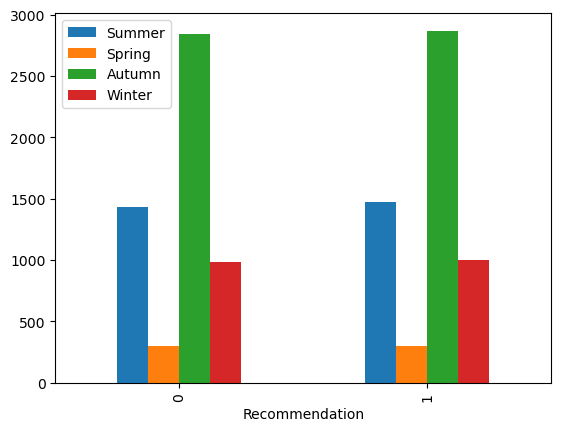

In [249]:

df.groupby("Recommendation")["Summer","Spring","Autumn","Winter"].mean().plot.bar()

In [237]:
# Spring sale vs Recommendation.
df.groupby("Recommendation")["Spring"].mean()

Recommendation
0    298.209559
1    303.658291
Name: Spring, dtype: float64

In [238]:
# Autumn sale vs Recommendation.
df.groupby("Recommendation")["Autumn"].mean()

Recommendation
0    2841.720588
1    2868.060302
Name: Autumn, dtype: float64

In [239]:
# Winter sale vs Recommendation.
df.groupby("Recommendation")["Winter"].mean()

Recommendation
0     987.654412
1    1002.809045
Name: Winter, dtype: float64

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [253]:
# Size vs Recommendation.
df.groupby("Size")["Recommendation"].sum()

Size
Extra large     4
Free           74
Large          32
Medium         76
Small          13
Name: Recommendation, dtype: int64

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [257]:
# plot the heat map of Style, price and Recommendation.
res=pd.pivot_table(data=df,index="Style",columns="Price",values="Recommendation")

<Axes: xlabel='Price', ylabel='Style'>

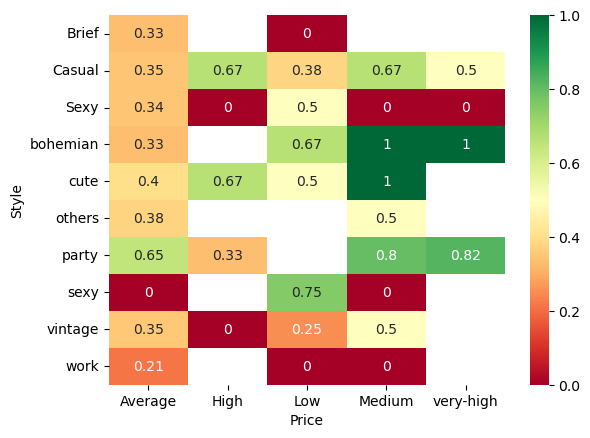

In [259]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


In [266]:
# plot the heat map of Season, material and Recommendation.
res1=pd.pivot_table(data=df,index="Material",columns="Season",values="Recommendation")

<Axes: xlabel='Season', ylabel='Material'>

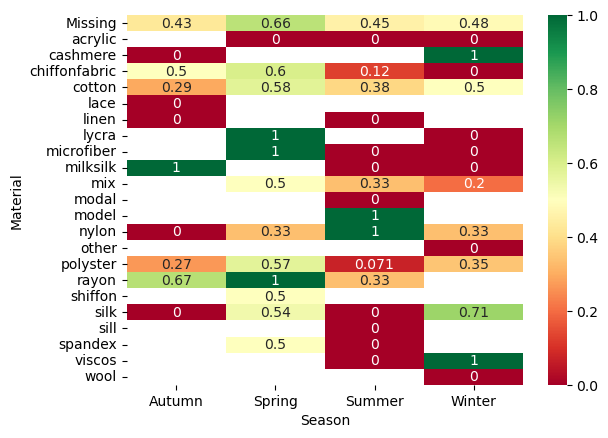

In [267]:
sns.heatmap(res1,annot=True,cmap="RdYlGn")